In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import math
import warnings

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_fscore_support,classification_report

from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [199]:
warnings.filterwarnings("ignore")

In [200]:
df = pd.read_csv("D:\lap trinh\data for analyst\customer_churn.csv", encoding = 'ISO-8859-1')

# I/ Data Overall Information

In [201]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Return
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Xem thông tin các cột

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Dữ liệu cụ thể từng cột

In [203]:
for col in df.columns:
    print("\033[1m"+col+"\033[0m")
    print(df[col].unique())

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

### Thống kê các cột có kiểu dữ liệu số

In [204]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# II/ Data cleaning

### Nhận thấy cột TotalCharges đang ở dạng Object, cần ép kiểu về dạng float

In [205]:
df = df[df['TotalCharges'] != " "] # Do có 1 giá trị " " ở trong cột nên cần loại bỏ để có thể chuyển về dạng float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], downcast='float')

### Kiểm tra dữ liệu Null

In [206]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Return              0
dtype: int64

### Xử lí Outliers cho 3 cột số thực MonthlyCharges ,TotalCharges, Tenure

In [207]:
# Không xử lí cho cột SeniorCitizen vì cột này chỉ chứa 2 giá trị nhị nhân rời rạc
for col in ["MonthlyCharges","TotalCharges","tenure"]:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    df = df[(df[col] > q1 - 1.5 * iqr) & (df[col] < q3 + 1.5 * iqr)]

### Xem lại chỉ số

In [208]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300537
std,0.368844,24.545260,30.085974,2266.770508
min,0.000000,1.000000,18.250000,18.799999
25%,0.000000,9.000000,35.587500,401.449997
50%,0.000000,29.000000,70.350000,1397.475037
75%,0.000000,55.000000,89.862500,3794.737488
max,1.000000,72.000000,118.750000,8684.799805


# III/ Data Exploration

## Số lượng khách hàng rời đi và không rời đi theo giới tính

In [209]:
df_gender_return = df.groupby(['gender', 'Return']).count()["customerID"].unstack(fill_value=0).reset_index()
df_gender_return

Return,gender,No,Yes
0,Female,2544,939
1,Male,2619,930


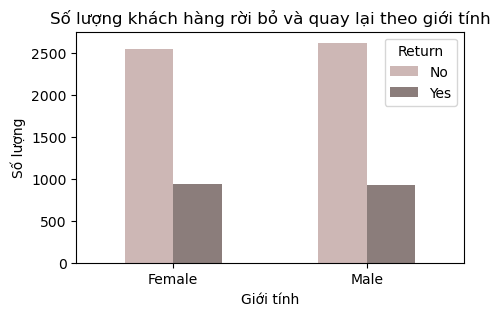

In [210]:
df_gender_return.set_index('gender').plot(kind='bar', color=['#CDB7B5', '#8B7D7B'], figsize=(5, 3))
plt.ylabel('Số lượng')
plt.xlabel('Giới tính')
plt.title('Số lượng khách hàng rời bỏ và quay lại theo giới tính')
plt.xticks(rotation=0)
plt.show()

### Nhận thấy :

#### Thuộc tính giới tính không tác động nhiều tới việc quyết định rời bỏ sử dụng dịch vụ hay là tiếp tục sử dụng dịch vụ 

## Số lượng khách hàng trẻ và cao tuổi rời đi và không rời đi 

In [211]:
df_SeniorCitizen_return = df.groupby(['SeniorCitizen', 'Return']).count()["customerID"].unstack(fill_value=0).reset_index()
df_SeniorCitizen_return

Return,SeniorCitizen,No,Yes
0,0,4497,1393
1,1,666,476


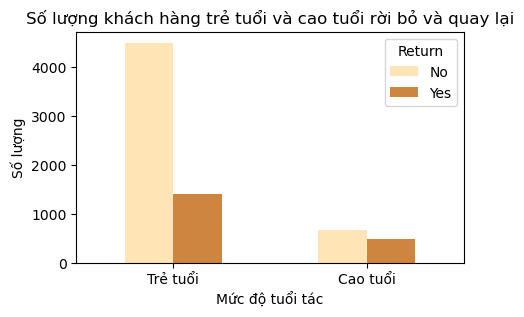

In [212]:
df_SeniorCitizen_return.set_index('SeniorCitizen').plot(kind='bar', color=['#FFE4B5', '#CD853F'], figsize=(5, 3))
plt.xticks([0, 1],["Trẻ tuổi","Cao tuổi"] )
plt.xticks(rotation=0)
plt.ylabel('Số lượng')
plt.xlabel('Mức độ tuổi tác')
plt.title('Số lượng khách hàng trẻ tuổi và cao tuổi rời bỏ và quay lại')
plt.show()

### Nhận thấy :

#### Mức độ tuổi tác có ảnh hưởng lớn đến việc quyết định rời bỏ sử dụng dịch vụ. Đối với những người trẻ tuổi , biểu đồ cho thấy lượng người rời bỏ lớn hơn rất nhiều so với lượng người tiếp tục sử dụng dịch vụ, có thể họ có nhiều nhu cầu hơn về mọi mặt như giải trí, học tập, nghiên cứu, nên họ muốn sử dụng qua nhiều loại dịch vụ từ các nhà cung cấp khác nhau để có thể tìm được 1 nhà cung cấp phù hợp với họ nhất . Trong khi đó đối với những người cao tuổi, thì lượng người rời bỏ chỉ lớn hơn 1 chút ít so với lượng người tiếp tục sử dụng dịch vụ, điều này thể hiện rằng, nhu cầu sử dụng dịch vụ của những người cao tuổi không quá đa dạng, và họ không cần thiết để thử sử dụng qua nhiều loại dịch vụ từ các nhà cung cấp khác nhau.

## Số lượng khách hàng rời đi và không rời đi theo thời gian sử dụng dịch vụ

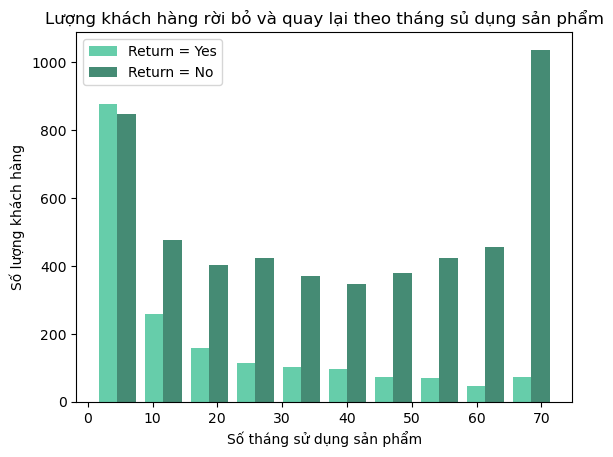

In [213]:
df_tenure_yes = df[df["Return"] == 'Yes'].tenure
df_tenure_no = df[df["Return"] == 'No'].tenure

plt.hist([df_tenure_yes,df_tenure_no],color = ['#66CDAA','#458B74'], label = ["Return = Yes","Return = No"])
plt.ylabel('Số lượng khách hàng')
plt.xlabel('Số tháng sử dụng sản phẩm')
plt.title('Lượng khách hàng rời bỏ và quay lại theo tháng sủ dụng sản phẩm')
plt.legend()
plt.show()

### Nhận thấy : 
#### Một điều khá dễ nhận thấy là đối với những khách hàng sử dụng dịch vụ dưới 1 năm thì có số lượng khách tiếp tục sử dụng dịch vụ là rất cao, nhưng khi thời gian sử dụng dịch vụ trên 1 ,2 ,3 năm thì lượng khách tiếp tục sử dụng dịch vụ càng giảm và lượng khách rời bỏ càng tăng. Điều này cho thấy, sản phẩm dịch vụ của nhà cung cấp chỉ đáp ứng tốt nhu cầu của khách hàng trong thời gian đầu, nhưng càng về sau thì nhà cung cấp không thể giữ chân được khách hàng cũ, lí do có thể dịch vụ không được cập nhật xu thế để có thể đáp ứng nhu cầu ngày càng 1 tăng của khách hàng, chương trình ưu đãi không hấp dẫn cho các khách hàng lâu năm....


## Số lượng khách hàng rời đi và không rời đi theo các loại chính sách gói đăng ký sử dụng dịch vụ 

In [214]:
df_contract_return = df.groupby(['Contract', 'Return']).count()["customerID"].unstack(fill_value=0).reset_index()
df_contract_return

Return,Contract,No,Yes
0,Month-to-month,2220,1655
1,One year,1306,166
2,Two year,1637,48


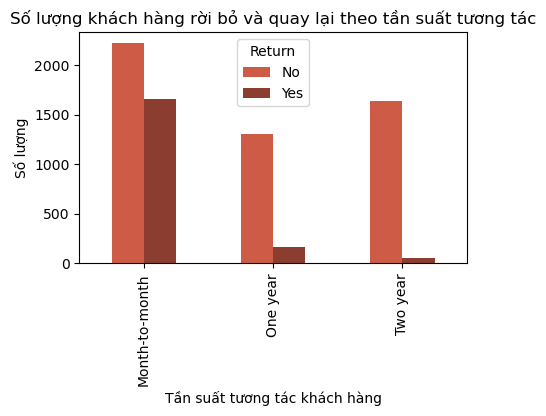

In [215]:
df_contract_return.set_index('Contract').plot(kind='bar', color=['#CD5B45', '#8B3E2F'], figsize=(5, 3))
plt.ylabel('Số lượng')
plt.xlabel('Tần suất tương tác khách hàng')
plt.title('Số lượng khách hàng rời bỏ và quay lại theo tần suất tương tác')
plt.show()

### Nhận thấy 
#### Khá tương đồng với biểu đồ thể hiện số lượng khách hàng rời đi và không rời đi theo thời gian sử dụng dịch vụ ở mục trên. Thể hiện rằng nhà cung cấp không thể giữ chân được khách hàng đã sử dụng dịch vụ trong thời gian dài. Thì biểu đồ này cũng cho thấy điều đó, khi mà các khách hàng đăng ký sử dụng gói hàng tháng thì có số lượng tiếp tục sử dụng dịch vụ rất cao, nhưng đối với các khách hàng đăng ký gói dài hạn như 1 2 năm thì họ lại có xu hướng không muốn tiếp tục sử dụng dịch vụ nữa.


## Số lượng khách hàng rời đi và không rời đi theo từng khoảng chi phí họ bỏ ra hàng tháng 

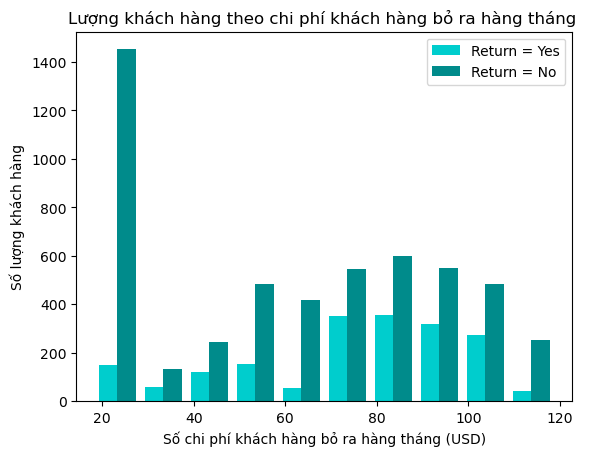

In [216]:
df_MonthlyCharges_yes = df[df["Return"] == 'Yes'].MonthlyCharges
df_MonthlyCharges_no = df[df["Return"] == 'No'].MonthlyCharges

plt.hist([df_MonthlyCharges_yes,df_MonthlyCharges_no],color = ['#00CDCD','#008B8B'], label = ["Return = Yes","Return = No"])
plt.ylabel('Số lượng khách hàng')
plt.xlabel('Số chi phí khách hàng bỏ ra hàng tháng (USD)')
plt.title('Lượng khách hàng theo chi phí khách hàng bỏ ra hàng tháng ')
plt.legend()
plt.show()

### Nhận thấy 
#### + Đối với những khách hàng bỏ ra chi phí thấp như 20(USD) thì có thể họ chỉ đang đăng ký và sử dụng dịch vụ thử để xem dịch vụ có đáp ứng được nhu cầu của họ hay không , và phần lớn là không hoặc là gói đăng ký ngắn hạn của họ chưa cho phép họ sử dụng hết các tính năng của dịch vụ nên số lượng rời bỏ đi nhất nhiêù.
#### + Nhưng khi chi phí của khách hàng bỏ ra hàng tháng ngày cao thì chênh lệnh giữa lượng khách rời đi và tiếp tục sừ dụng dịch vụ càng dần được thu hẹp, điều này cho thấy chỉ khi 1 khách hàng đăng ký các gói cao cấp hoặc gần cao cấp , thì họ mới có thể sử dụng các tính năng đáp ứng nhu cầu của họ, từ đó họ mới khả năng cao quyết định tiếp tục sử dụng dịch vụ.


# IV/ Data cleaning for machine learning

### Xóa cột mang thông tin không cần thiết cho việc xây dựng mô hình 

In [217]:
df.drop("customerID", axis = 1, inplace = True)

### Định dạng dữ liệu string về dạng số nhị nhân để thuận lợi trong việc phân tích

In [218]:
# Định dạng dữ liệu về dạng nhị phân
df.replace({"Yes": 1, "No" : 0}, inplace = True)
df.replace({"Male" : 0, "Female" :1 }, inplace = True)
df.replace(["No internet service", "No phone service"], 0, inplace = True)

### Định dạng dữ liệu về dạng nhị phân đối với những cột có nhiều hơn 2 giá trị khác nhau 

In [219]:
df = pd.get_dummies(data = df, columns=["InternetService", "Contract", "PaymentMethod"])

### Định dạng lại kích cỡ dữ liệu của 3 cột "tenure","MonthlyCharges","TotalCharges" để đồng nhất hóa dữ liệu

In [220]:
col_to_scale = ["tenure","MonthlyCharges","TotalCharges"]
scaler = MinMaxScaler()
df[col_to_scale] = scaler.fit_transform(df[col_to_scale])

### Xem lại giá trị từng cột

In [221]:
for col in df.columns:
    print("\033[1m"+col+"\033[0m")
    print(df[col].unique())

gender
[1 0]
SeniorCitizen
[0 1]
Partner
[1 0]
Dependents
[0 1]
tenure
[0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService
[0 1]
MultipleLines
[0 1]
OnlineSecurity
[0 1]
OnlineBackup
[1 0]
DeviceProtection
[0 1]
TechSupport
[0 1]
Stream

# V/ Data feature relationship

In [222]:
# tạo lập các biến và các tập train và test
x = df.drop("Return", axis =1)
y = df["Return"]

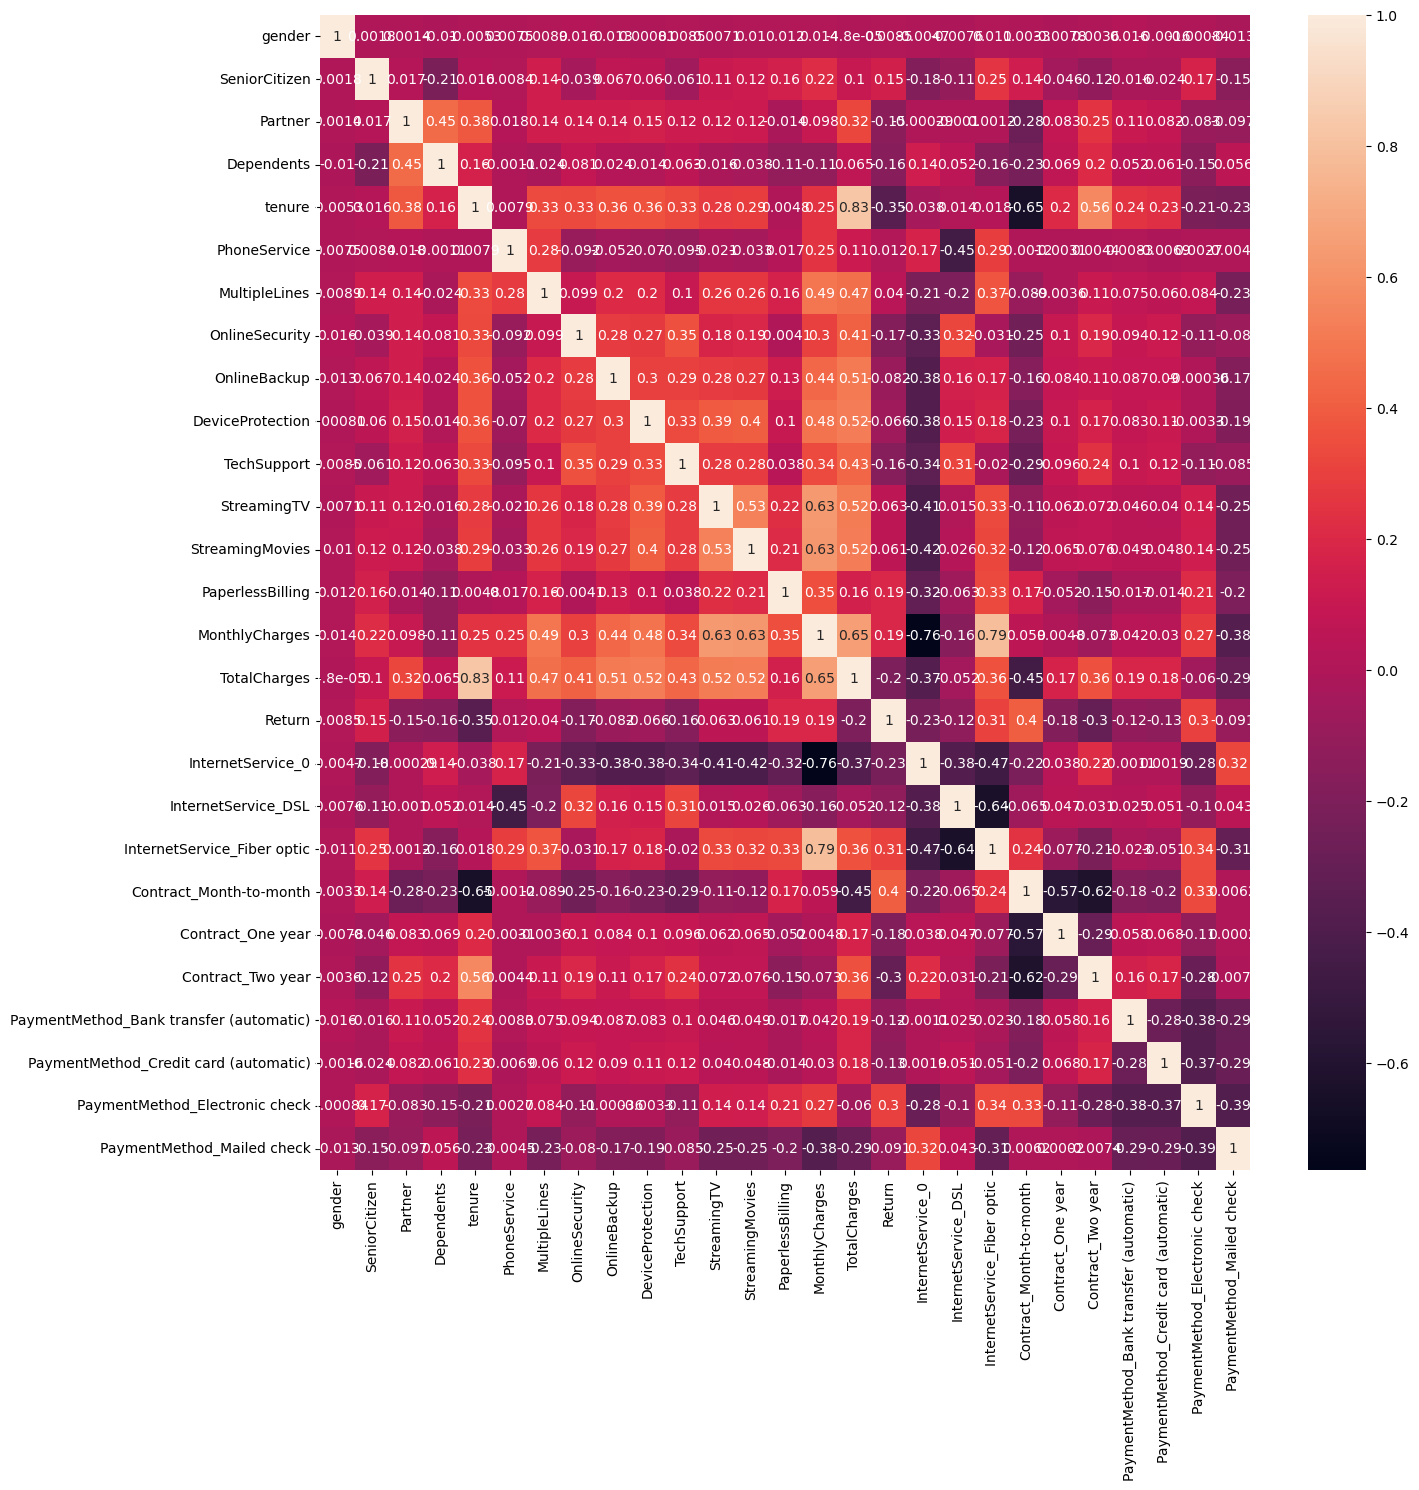

In [223]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot = True)
plt.show()

### Nhận thấy
#### Các cặp thuộc tính có mối tương quan cao với nhau là :
#### + MonthlyCharges ( tổng chi phí chi trả cho dịch vụ hàng tháng) và TotalCharges ( tổng chi phí chi trả cho dịch vụ)
#### + Tenure ( thời gian sử dụng dịch vụ) và TotalCharges ( tổng chi phí chi trả cho dịch vụ)
#### + InternetService_Fiber optic ( Có hay là không việc sử dụng dịch vụ Optic cáp quang) và MonthlyCharges ( tổng chi phí chi trả cho dịch vụ hàng tháng)
#### + StreamingMovies (Có hay là không việc sử dụng dịch vụ xem phim trực tiếp) và MonthlyCharges ( tổng chi phí chi trả cho dịch vụ hàng tháng)
#### + StreamingTV (Có hay là không việc sử dụng dịch vụ xem truyền hình trực tiếp) và MonthlyCharges ( tổng chi phí chi trả cho dịch vụ hàng tháng)

### MonthlyCharges và TotalCharges

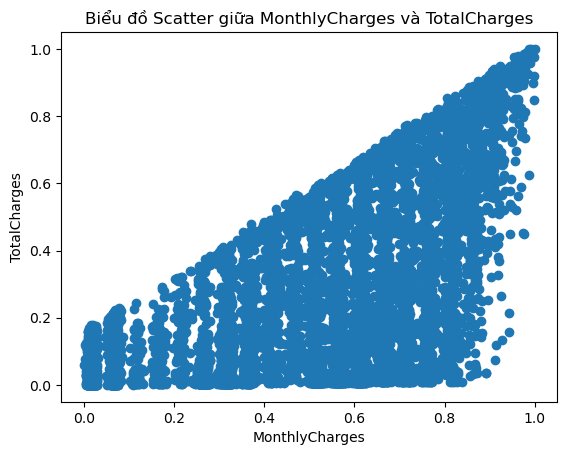

In [224]:
plt.scatter(df['MonthlyCharges'], df['TotalCharges'])

# Đặt tên trục x và trục y
plt.xlabel('MonthlyCharges')
plt.ylabel('TotalCharges')

# Đặt tiêu đề cho biểu đồ
plt.title('Biểu đồ Scatter giữa MonthlyCharges và TotalCharges')

# Hiển thị biểu đồ
plt.show()

#### Nhận thấy khi khách hàng bỏ ra phí đăng ký dịch vụ hàng tháng ra cao hơn, thì trung bình tổng chi phí họ bỏ ra cũng tuyến tính tăng. Nhưng có 1 vài trường hợp khi chi phí họ bỏ ra hàng tháng tăng nhưng tổng chi phí không tăng, thì có thể có 1 lượng khách hàng bỏ ra chi phí đăng kí rất cao chỉ trong 1 số tháng nhưng không đăng ký đều đặn hàng tháng, có thể họ là tệp khách hàng chỉ muốn sử dụng dịch vụ theo 1 chu kỳ nhu cầu nào đó.

### Tenure và TotalCharges

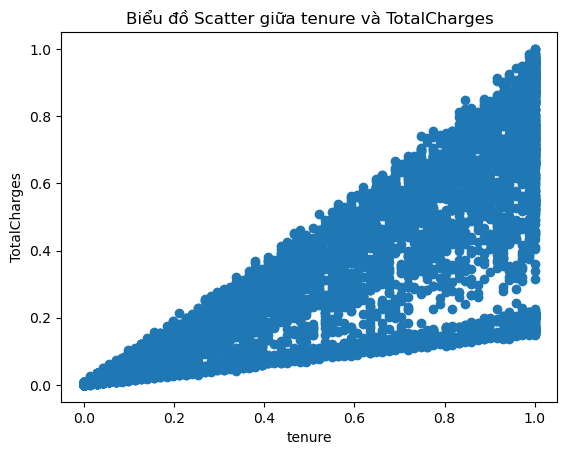

In [225]:
plt.scatter(df['tenure'], df['TotalCharges'])

# Đặt tên trục x và trục y
plt.xlabel('tenure')
plt.ylabel('TotalCharges')

# Đặt tiêu đề cho biểu đồ
plt.title('Biểu đồ Scatter giữa tenure và TotalCharges')

# Hiển thị biểu đồ
plt.show()

#### Nhận thấy khi thời gian khách hàng đăng ký để sử dụng dịch vụ hàng tháng ra cao hơn, thì trung bình tổng chi phí họ bỏ ra cũng tuyến tính tăng , điều này cho thấy nhà cung cấp dịch vụ có 1 lượng khách hàng trung thành rất lớn, khi càng sử dụng dịch vụ thì họ càng tiếp tục bỏ chi phí ra để đăng ký tiếp.

### InternetService_Fiber optic và MonthlyCharges 

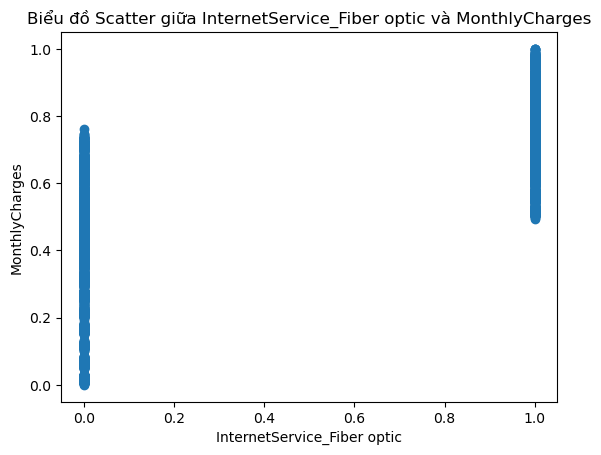

In [226]:
plt.scatter(df['InternetService_Fiber optic'], df['MonthlyCharges'])

# Đặt tên trục x và trục y
plt.xlabel('InternetService_Fiber optic')
plt.ylabel('MonthlyCharges')

# Đặt tiêu đề cho biểu đồ
plt.title('Biểu đồ Scatter giữa InternetService_Fiber optic và MonthlyCharges')

# Hiển thị biểu đồ
plt.show()

### Nhận thấy tệp khách hàng có đăng ký sử dụng dịch vụ otip cáp quang thì chi phí hàng tháng họ bỏ ra cho việc đăng ký dịch vụ cao hơn gấp 2 so với những khách hàng không đăng ký. Có thể thấy rằng, dịch vụ otip cáp quang của hãng đang hoạt động rất tốt, đáp ứng được nhu cầu của khách hàng.

###  StreamingMovies và MonthlyCharges 

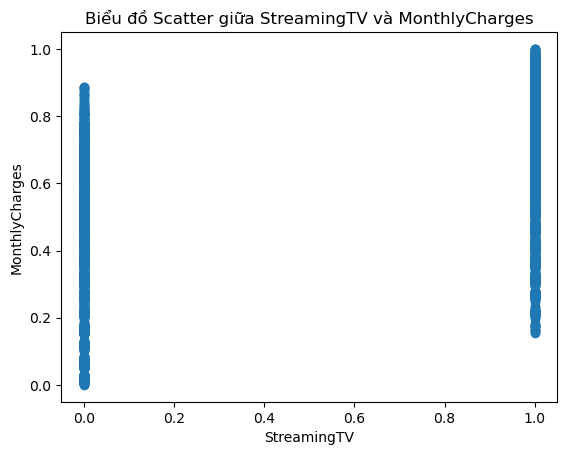

In [227]:
plt.scatter(df['StreamingTV'], df['MonthlyCharges'])

# Đặt tên trục x và trục y
plt.xlabel('StreamingTV')
plt.ylabel('MonthlyCharges')

# Đặt tiêu đề cho biểu đồ
plt.title('Biểu đồ Scatter giữa StreamingTV và MonthlyCharges')

# Hiển thị biểu đồ
plt.show()

### Nhận thấy tệp khách hàng có đăng ký sử dụng dịch vụ xem phim trực tiếp thì chi phí hàng tháng họ bỏ ra cho việc đăng ký dịch vụ cao hơn so với những khách hàng không đăng ký. Nhưng độ chênh lệnh không quá lớn, nên chưa thể kết luận điều gì. 

### StreamingTV  và MonthlyCharges

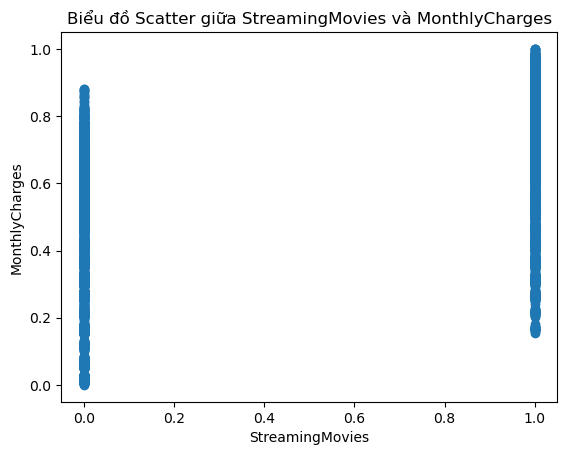

In [228]:
plt.scatter(df['StreamingMovies'], df['MonthlyCharges'])

# Đặt tên trục x và trục y
plt.xlabel('StreamingMovies')
plt.ylabel('MonthlyCharges')

# Đặt tiêu đề cho biểu đồ
plt.title('Biểu đồ Scatter giữa StreamingMovies và MonthlyCharges')

# Hiển thị biểu đồ
plt.show()

### Nhận thấy tệp khách hàng có đăng ký sử dụng dịch vụ xem TV trực tiếp thì chi phí hàng tháng họ bỏ ra cho việc đăng ký dịch vụ cao hơn so với những khách hàng không đăng ký. Nhưng độ chênh lệnh không quá lớn, nên chưa thể kết luận điều gì. 

# VI/ Data modeling

In [229]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 15, stratify = y)

## Xây dựng hàm trả về kết quả đánh giá các thông số cho mô hình

In [230]:
methodDict = {} # Dictionary lưu các keys là tên các mô hình, và values là accuracy_score

def EvaluateModel(model, y_test, y_pred, plot=False):
   
   # Trực quan hóa ma trận nhầm lận
   confusion = metrics.confusion_matrix(y_true =y_test, y_pred = y_pred)
   sns.heatmap(confusion,annot=True,fmt="d") 
   plt.title('Confusion Matrix')
   plt.xlabel('Predicted')
   plt.ylabel('Actual')
   plt.show()
   
   # Tính accuracy
   accuracy = metrics.accuracy_score(y_test, y_pred)
   print('Classification Accuracy:', accuracy)
   
   # Tính inaccuracy
   print('Classification Error:', 1 - accuracy)
   
   # Tính những thông số chung
   print('Classification Accuracy: \n' ,classification_report(y_test,y_pred))
    
   precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred)
   # Lấy giá trị F1-score của lớp 0
   f1_score_class_0 = f1_score[0]
   # lưu các keys là tên các mô hình, và values là accuracy_score
   methodDict[model.__class__.__name__] = np.array([accuracy * 100,f1_score_class_0*100])

## Xây dựng hàm trả về các bộ tham số tối ưu cho các mô hình

In [231]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 2)

def RandomSearch(model, param_dist):
  reg_random = RandomizedSearchCV(estimator=model,
                    param_distributions=param_dist,
                    n_iter=10,  
                    cv=kf,
                    n_jobs=8,
                    scoring='accuracy',
                    random_state =2)
  reg_random.fit(x_train,y_train)
  y_pred = reg_random.predict(x_test)
  print('RandomSearch. Best Score: ', reg_random.best_score_)
  print('RandomSearch. Best Params: ', reg_random.best_params_)
  accuracy_score = EvaluateModel(model, y_test, y_pred, plot =True)

## Build Logistic regression Model

RandomSearch. Best Score:  0.8028444444444445
RandomSearch. Best Params:  {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 500}


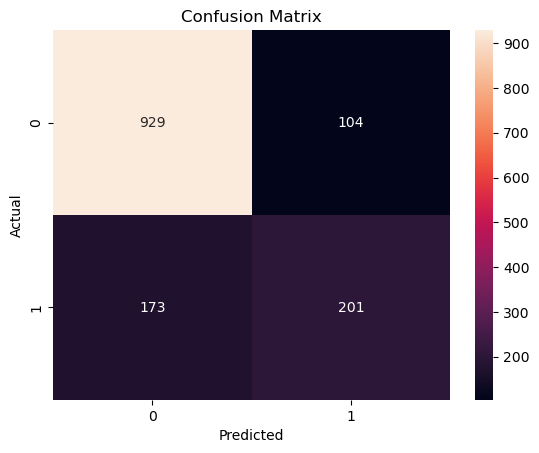

Classification Accuracy: 0.8031272210376688
Classification Error: 0.19687277896233124
Classification Accuracy: 
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.66      0.54      0.59       374

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.79      0.80      0.80      1407



In [232]:
# chạy mô hình 
model_reg = LogisticRegression()
param_dist = {
    'penalty': ['l1', 'l2'],  # Loại regularization
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag'],  # Thuật toán tối ưu hóa
    'max_iter': [100, 500, 1000]  # Số lần lặp tối đa
}
RandomSearch(model_reg, param_dist)

### Nhận xét :
#### Dựa trên kết quả của confusion matrix, ta có các giá trị sau đây:

#### Lớp 0 (khách hàng không quay lại):
Precision (độ chính xác): 0.84. Điều này có nghĩa là 84% các dự đoán được xác định là khách hàng không quay lại là chính xác.

Recall (độ bao phủ): 0.90. Điều này cho biết mô hình xác định chính xác 90% các khách hàng không quay lại trong số tất cả khách hàng không quay lại thực tế.

F1-score: 0.87. F1-score là một số đo tổng hợp của độ chính xác và độ bao phủ, và giá trị 0.87 cho thấy mô hình có hiệu suất tốt trong việc phân loại khách hàng không quay lại.

#### Lớp 1 (khách hàng quay lại):
Precision: 0.66. Điều này cho biết 66% các dự đoán được xác định là khách hàng quay lại là chính xác.

Recall: 0.54. Điều này cho biết mô hình xác định chính xác 54% các khách hàng quay lại trong số tất cả khách hàng quay lại thực tế.

F1-score: 0.59. F1-score của lớp 1 là 0.59, cho thấy mô hình có hiệu suất thấp hơn trong việc phân loại khách hàng quay lại so với khách hàng không quay lại.

#### Accuracy : 0.80. Điều này cho biết 80% các dự đoán của mô hình trên toàn tập dữ liệu là chính xác.


## Build K-NN Model

RandomSearch. Best Score:  0.7916444444444445
RandomSearch. Best Params:  {'weights': 'uniform', 'n_neighbors': 24}


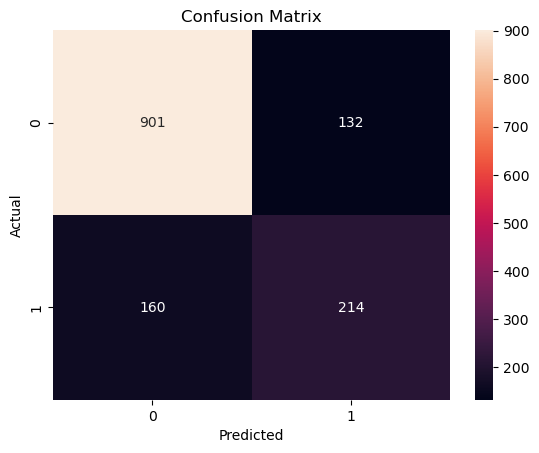

Classification Accuracy: 0.7924662402274343
Classification Error: 0.20753375977256572
Classification Accuracy: 
               precision    recall  f1-score   support

           0       0.85      0.87      0.86      1033
           1       0.62      0.57      0.59       374

    accuracy                           0.79      1407
   macro avg       0.73      0.72      0.73      1407
weighted avg       0.79      0.79      0.79      1407



In [233]:
model_KNN = KNeighborsClassifier()

param_dist = {'n_neighbors': list(range(1,31)),
              'weights' :['uniform', 'distance']}

RandomSearch(model_KNN, param_dist)

### Nhận xét :
#### Dựa trên kết quả của confusion matrix, ta có các giá trị sau đây:

#### Lớp 0 (khách hàng không quay lại):
Precision (độ chính xác): 0.85. Điều này có nghĩa là 85% các dự đoán được xác định là khách hàng không quay lại là chính xác.

Recall (độ bao phủ): 0.87. Điều này cho biết mô hình xác định chính xác 87% các khách hàng không quay lại trong số tất cả khách hàng không quay lại thực tế.

F1-score: 0.86. F1-score là một số đo tổng hợp của độ chính xác và độ bao phủ, và giá trị 0.86 cho thấy mô hình có hiệu suất tốt trong việc phân loại khách hàng không quay lại.

#### Lớp 1 (khách hàng quay lại):
Precision: 0.62. Điều này cho biết 62% các dự đoán được xác định là khách hàng quay lại là chính xác.

Recall: 0.57. Điều này cho biết mô hình xác định chính xác 57% các khách hàng quay lại trong số tất cả khách hàng quay lại thực tế.

F1-score: 0.59. F1-score của lớp 1 là 0.59, cho thấy mô hình có hiệu suất thấp hơn trong việc phân loại khách hàng quay lại so với khách hàng không quay lại.

#### Accuracy : 0.79. Điều này cho biết 79% các dự đoán của mô hình trên toàn tập dữ liệu là chính xác.

## Build Bayes Model

RandomSearch. Best Score:  0.7441777777777777
RandomSearch. Best Params:  {'var_smoothing': 1e-09, 'priors': None}


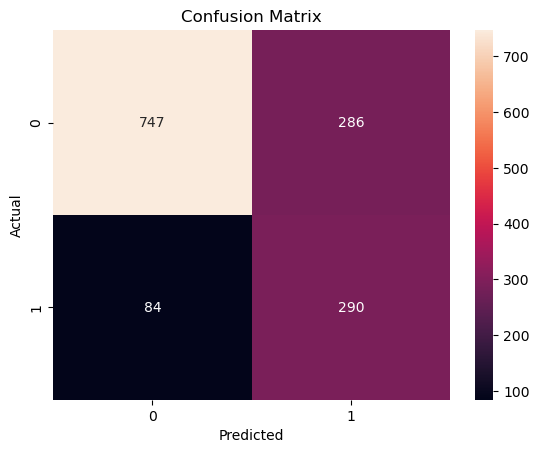

Classification Accuracy: 0.7370291400142146
Classification Error: 0.2629708599857854
Classification Accuracy: 
               precision    recall  f1-score   support

           0       0.90      0.72      0.80      1033
           1       0.50      0.78      0.61       374

    accuracy                           0.74      1407
   macro avg       0.70      0.75      0.71      1407
weighted avg       0.79      0.74      0.75      1407



In [234]:
model_bayes = GaussianNB()
param_dist = {
    'priors': [None],  # Phân phối xác suất tiền nghiệm cho các lớp, None để tự động học từ dữ liệu
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # Sự mịn của phương sai
}
RandomSearch(model_bayes, param_dist)

### Nhận xét :
#### Dựa trên kết quả của confusion matrix, ta có các giá trị sau đây:

#### Lớp 0 (khách hàng không quay lại):
Precision (độ chính xác): 0.90. Điều này có nghĩa là 90% các dự đoán được xác định là khách hàng không quay lại là chính xác.

Recall (độ bao phủ): 0.72. Điều này cho biết mô hình xác định chính xác 72% các khách hàng không quay lại trong số tất cả khách hàng không quay lại thực tế.

F1-score: 0.80. F1-score là một số đo tổng hợp của độ chính xác và độ bao phủ, và giá trị 0.80 cho thấy mô hình có hiệu suất tốt trong việc phân loại khách hàng không quay lại.

#### Lớp 1 (khách hàng quay lại):
Precision: 0.50. Điều này cho biết 50% các dự đoán được xác định là khách hàng quay lại là chính xác.

Recall: 0.78. Điều này cho biết mô hình xác định chính xác 78% các khách hàng quay lại trong số tất cả khách hàng quay lại thực tế.

F1-score: 0.61. F1-score của lớp 1 là 0.61, cho thấy mô hình có hiệu suất thấp hơn trong việc phân loại khách hàng quay lại so với khách hàng không quay lại.

#### Accuracy : 0.74. Điều này cho biết 74% các dự đoán của mô hình trên toàn tập dữ liệu là chính xác.

## Build Perceptron Model

RandomSearch. Best Score:  0.7624888888888889
RandomSearch. Best Params:  {'penalty': 'l1', 'max_iter': 5000, 'alpha': 0.001}


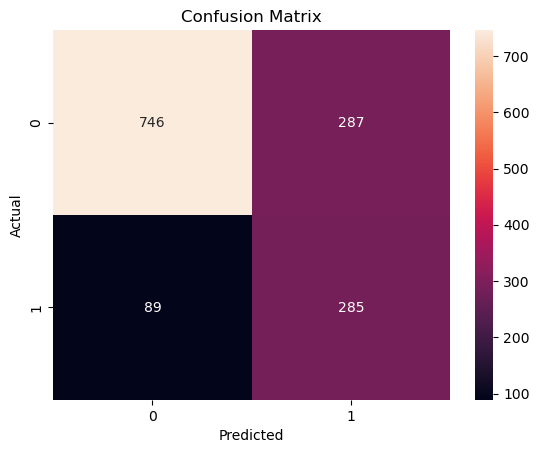

Classification Accuracy: 0.7327647476901208
Classification Error: 0.2672352523098792
Classification Accuracy: 
               precision    recall  f1-score   support

           0       0.89      0.72      0.80      1033
           1       0.50      0.76      0.60       374

    accuracy                           0.73      1407
   macro avg       0.70      0.74      0.70      1407
weighted avg       0.79      0.73      0.75      1407



In [235]:
model_percep = Perceptron(random_state= 42, max_iter= 100, tol = 0.001)
param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet'],  # Loại hình phạt: L1, L2, hoặc ElasticNet
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],  # Hệ số phạt
    'max_iter': [1000, 5000, 10000]  # Số lần lặp tối đa
}
RandomSearch(model_percep, param_dist)

### Nhận xét :
#### Dựa trên kết quả của confusion matrix, ta có các giá trị sau đây:

#### Lớp 0 (khách hàng không quay lại):
Precision (độ chính xác): 0.89. Điều này có nghĩa là 89% các dự đoán được xác định là khách hàng không quay lại là chính xác.

Recall (độ bao phủ): 0.72. Điều này cho biết mô hình xác định chính xác 72% các khách hàng không quay lại trong số tất cả khách hàng không quay lại thực tế.

F1-score: 0.80. F1-score là một số đo tổng hợp của độ chính xác và độ bao phủ, và giá trị 0.80 cho thấy mô hình có hiệu suất tốt trong việc phân loại khách hàng không quay lại.

#### Lớp 1 (khách hàng quay lại):
Precision: 0.50. Điều này cho biết 50% các dự đoán được xác định là khách hàng quay lại là chính xác.

Recall: 0.76. Điều này cho biết mô hình xác định chính xác 76% các khách hàng quay lại trong số tất cả khách hàng quay lại thực tế.

F1-score: 0.60. F1-score của lớp 1 là 0.60, cho thấy mô hình có hiệu suất thấp hơn trong việc phân loại khách hàng quay lại so với khách hàng không quay lại.

#### Accuracy : 0.73. Điều này cho biết 73% các dự đoán của mô hình trên toàn tập dữ liệu là chính xác.

## Build Neural network tree Model

RandomSearch. Best Score:  0.7930666666666667
RandomSearch. Best Params:  {'max_iter': 100, 'hidden_layer_sizes': (64,), 'activation': 'relu'}


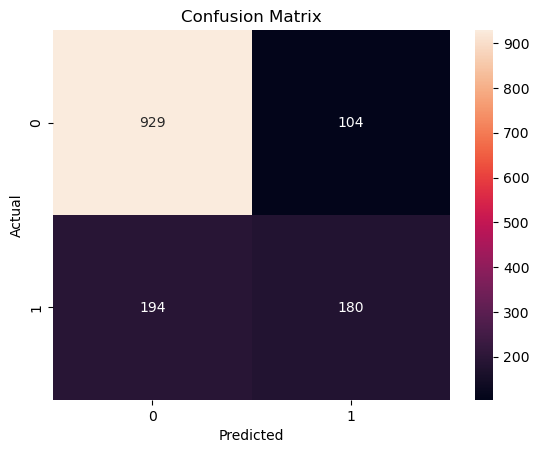

Classification Accuracy: 0.7882018479033405
Classification Error: 0.21179815209665953
Classification Accuracy: 
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407



In [236]:
model_neural = MLPClassifier()
param_dist = {
    'hidden_layer_sizes': [(64,), (128,), (64, 32), (128, 64)],  # Cấu trúc các hidden layer
    'activation': ['relu', 'sigmoid'],  # Hàm kích hoạt cho các layer ẩn
    'max_iter': [100, 200, 500],  # Số lần lặp tối đa
}
RandomSearch(model_neural, param_dist)

### Nhận xét :
#### Dựa trên kết quả của confusion matrix, ta có các giá trị sau đây:

#### Lớp 0 (khách hàng không quay lại):
Precision (độ chính xác): 0.83. Điều này có nghĩa là 83% các dự đoán được xác định là khách hàng không quay lại là chính xác.

Recall (độ bao phủ): 0.90. Điều này cho biết mô hình xác định chính xác 90% các khách hàng không quay lại trong số tất cả khách hàng không quay lại thực tế.

F1-score: 0.86. F1-score là một số đo tổng hợp của độ chính xác và độ bao phủ, và giá trị 0.86 cho thấy mô hình có hiệu suất tốt trong việc phân loại khách hàng không quay lại.

#### Lớp 1 (khách hàng quay lại):
Precision: 0.63. Điều này cho biết 63% các dự đoán được xác định là khách hàng quay lại là chính xác.

Recall: 0.48. Điều này cho biết mô hình xác định chính xác 48% các khách hàng quay lại trong số tất cả khách hàng quay lại thực tế.

F1-score: 0.55. F1-score của lớp 1 là 0.55, cho thấy mô hình có hiệu suất thấp hơn trong việc phân loại khách hàng quay lại so với khách hàng không quay lại.

#### Accuracy : 0.79. Điều này cho biết 79% các dự đoán của mô hình trên toàn tập dữ liệu là chính xác.

## Build RandomForest model

########### Random Forest ###############
RandomSearch. Best Score:  0.8026666666666668
RandomSearch. Best Params:  {'n_estimators': 67, 'min_samples_split': 6, 'min_samples_leaf': 8, 'max_features': 11, 'max_depth': 8, 'criterion': 'gini'}


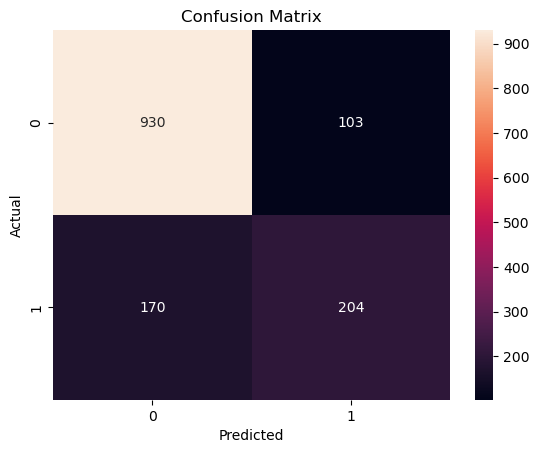

Classification Accuracy: 0.8059701492537313
Classification Error: 0.19402985074626866
Classification Accuracy: 
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1033
           1       0.66      0.55      0.60       374

    accuracy                           0.81      1407
   macro avg       0.75      0.72      0.74      1407
weighted avg       0.80      0.81      0.80      1407



In [237]:
model_RDF = RandomForestClassifier()
estimators = [int(x) for x in np.linspace(start = 1, stop = 100, num = 10)]
param_dist = {'n_estimators' : estimators,
             'max_depth': list(range(1, 9)),
              "max_features": list(range(1, len(x.columns))),
              "min_samples_split": list(range(3, 9)),
              "min_samples_leaf": list(range(1, 9)),
              "criterion": ["gini", "entropy"]} 


print('########### Random Forest ###############')

RandomSearch(model_RDF, param_dist)


### Nhận xét :
#### Dựa trên kết quả của confusion matrix, ta có các giá trị sau đây:

#### Lớp 0 (khách hàng không quay lại):
Precision (độ chính xác): 0.85. Điều này có nghĩa là 85% các dự đoán được xác định là khách hàng không quay lại là chính xác.

Recall (độ bao phủ): 0.90. Điều này cho biết mô hình xác định chính xác 90% các khách hàng không quay lại trong số tất cả khách hàng không quay lại thực tế.

F1-score: 0.87. F1-score là một số đo tổng hợp của độ chính xác và độ bao phủ, và giá trị 0.87 cho thấy mô hình có hiệu suất tốt trong việc phân loại khách hàng không quay lại.

#### Lớp 1 (khách hàng quay lại):
Precision: 0.66. Điều này cho biết 66% các dự đoán được xác định là khách hàng quay lại là chính xác.

Recall: 0.55. Điều này cho biết mô hình xác định chính xác 55% các khách hàng quay lại trong số tất cả khách hàng quay lại thực tế.

F1-score: 0.60. F1-score của lớp 1 là 0.60, cho thấy mô hình có hiệu suất thấp hơn trong việc phân loại khách hàng quay lại so với khách hàng không quay lại.

#### Accuracy : 0.81. Điều này cho biết 81% các dự đoán của mô hình trên toàn tập dữ liệu là chính xác.

## Build Decision tree model

########### Decision-Tree ###############
RandomSearch. Best Score:  0.7916444444444444
RandomSearch. Best Params:  {'min_samples_split': 3, 'min_samples_leaf': 5, 'max_features': 19, 'max_depth': 5, 'criterion': 'gini'}


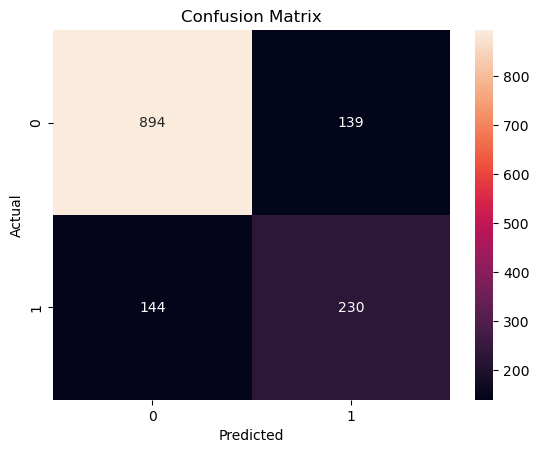

Classification Accuracy: 0.798862828713575
Classification Error: 0.20113717128642505
Classification Accuracy: 
               precision    recall  f1-score   support

           0       0.86      0.87      0.86      1033
           1       0.62      0.61      0.62       374

    accuracy                           0.80      1407
   macro avg       0.74      0.74      0.74      1407
weighted avg       0.80      0.80      0.80      1407



In [238]:
model_DTC = DecisionTreeClassifier()
param_dist = {'max_depth': list(range(1, 9)),
              "max_features": list(range(1, len(x.columns))),
              "min_samples_split": list(range(2, 9)),
              "min_samples_leaf": list(range(1, 9)),
              "criterion": ["gini", "entropy"],
              } 

print('########### Decision-Tree ###############')
RandomSearch(model_DTC, param_dist)

### Nhận xét :
#### Dựa trên kết quả của confusion matrix, ta có các giá trị sau đây:

#### Lớp 0 (khách hàng không quay lại):
Precision (độ chính xác): 0.86. Điều này có nghĩa là 86% các dự đoán được xác định là khách hàng không quay lại là chính xác.

Recall (độ bao phủ): 0.87. Điều này cho biết mô hình xác định chính xác 87% các khách hàng không quay lại trong số tất cả khách hàng không quay lại thực tế.

F1-score: 0.86. F1-score là một số đo tổng hợp của độ chính xác và độ bao phủ, và giá trị 0.86 cho thấy mô hình có hiệu suất tốt trong việc phân loại khách hàng không quay lại.

#### Lớp 1 (khách hàng quay lại):
Precision: 0.62. Điều này cho biết 62% các dự đoán được xác định là khách hàng quay lại là chính xác.

Recall: 0.61. Điều này cho biết mô hình xác định chính xác 61% các khách hàng quay lại trong số tất cả khách hàng quay lại thực tế.

F1-score: 0.62. F1-score của lớp 1 là 0.62, cho thấy mô hình có hiệu suất thấp hơn trong việc phân loại khách hàng quay lại so với khách hàng không quay lại.

#### Accuracy : 0.80. Điều này cho biết 80% các dự đoán của mô hình trên toàn tập dữ liệu là chính xác.

# VII/ Best Model for selection

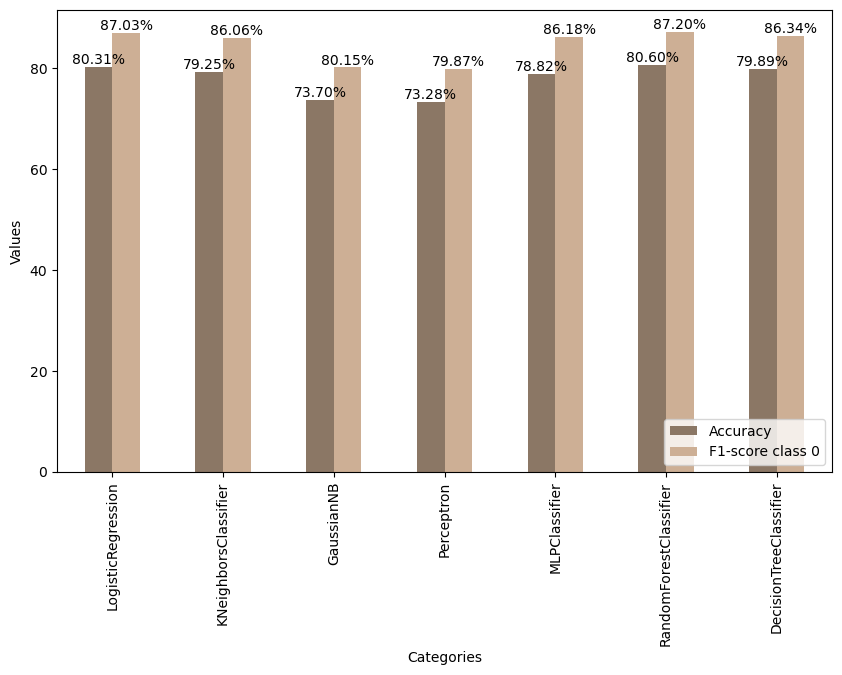

In [239]:
# Tạo DataFrame từ dictionary
df_method = pd.DataFrame(methodDict)
df_method = df_method.transpose()

# Vẽ biểu đồ unstacked column
ax = df_method.plot(kind='bar', stacked=False, width= 0.5,figsize=(10, 6), color = ["#8B7765","#CDAF95"])

# Đặt tên cho trục x và trục y
plt.xlabel('Categories')
plt.ylabel('Values')
plt.legend(["Accuracy","F1-score class 0"],loc='lower right')

# Hiển thị giá trị phần trăm bên trên các cột
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Hiển thị biểu đồ
plt.show()

### Nhận xét :

Vì mục tiêu phân tích của nhà cung cấp dịch vụ khi sử dụng các mô hình phân loại trên là có thể giữ chân được số lượng khách hàng đã sử dụng dịch vụ càng nhiều càng tốt, đồng nghĩa với việc tăng khả năng dự báo chính xác 1 khách hàng không quay trở lại sử dụng dịch vụ (class 0) trong thực tế, hạn chế việc dự đoán sai (Thực tế khách hàng không quay trở lại sử dụng dịch vụ nhưng mô hình lại dự đoán là vẫn tiếp tục sử dụng ), để có thể cung cấp và sửa đổi các chính sách quan tâm , giữ chân khách hàng 1 cách tốt nhất. 

Vì vậy để đánh giá các mô hình trên, ngoài Accuracy ra thì vì đây là tập dữ liệu mất cân bằng khi mà các nhãn phần lớn là 0, tức là đa phần khách hàng chọn không quay trở lại sử dụng dịch vụ. Nên chỉ tiêu F1-score của class 0 cần được ưu tiên trong việc so sánh giữa các mô hình trong trường hợp này để phù hợp với mục tiêu của phân tích của nhà cung cấp dịch vụ.

#### Vì vậy mô hình có khả năng dự đoán tốt nhất trong việc đáp ứng được nhu cầu cũng như mục tiêu phân tích của nhà cung cấp dịch vụ là :
### RandomForest model với Accuracy = 80.60% và F1-score class 0 = 87.20%